# ***Data reading***

In [57]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectFromModel, RFE, SelectKBest, f_classif
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV, train_test_split

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/santiagogz11/HRProject/main/cleanData/df.csv', index_col=0)

In [59]:
df.head(3)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,...,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,0,1,0,0,1,0,1,0,0,...,131160,1.0,11,0,1.0,6,1,0,0,0
1,0,1,0,0,1,0,0,1,0,0,...,41890,0.0,23,1,6.0,3,5,1,4,1
2,0,1,0,0,1,0,0,0,0,0,...,193280,1.0,15,3,5.0,2,5,0,3,0


In [60]:
df.columns

Index(['BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'Age', 'DistanceFromHome', 'Education',
       'EmployeeID', 'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorki

# ***Data treatment***

In [61]:
df.drop(columns='EmployeeID', inplace=True)

In [62]:
dummies = df.columns[pd.Series(df.columns.values).str.contains('_|Attrition', regex=True)].values

In [63]:
noDummies = df.columns[~df.columns.isin(dummies)].values

In [64]:
dummies = np.delete(dummies, np.where(dummies == 'Attrition'))

In [65]:
scaler = MinMaxScaler()
X_noDummies = scaler.fit_transform(df[noDummies])

In [66]:
X_dummies = df[dummies]

In [67]:
X = pd.concat([pd.DataFrame(X_dummies), pd.DataFrame(X_noDummies, columns=noDummies)], axis = 1)

In [68]:
y = df['Attrition']

In [69]:
kfold = kfold = KFold(n_splits=10, random_state=0, shuffle=True)

# ***Algorithms selection***

## ***1. Gaussian Naive Bayes***

In [70]:
GaussianNB_model = GaussianNB()
score_NB = cross_val_score(GaussianNB_model, X, y, scoring='recall', cv=kfold) # se puede utilizar ‘neg_root_mean_squared_error’
score_NB.mean()

0.3743230922519575

## ***2. Random Forest***

In [71]:
RandomForest_model = RandomForestClassifier(n_estimators=10)
score_RF = cross_val_score(RandomForest_model, X, y, scoring='recall', cv=kfold)
score_RF.mean()

0.9775514936390163

## ***3. Support Vector Machine***

### ***3.1 Support Vector Classifier***

In [72]:
SVC_model = SVC()
score_SVC = cross_val_score(SVC_model, X, y, scoring='recall', cv=kfold)
score_SVC.mean()

0.1711700005337069

### ***3.2 Linear Support Vector Classifier***

In [73]:
LSVC_model = LinearSVC()
score_LSVC = cross_val_score(LSVC_model, X, y, scoring='recall', cv=kfold)
score_LSVC.mean()

0.0229129402029071

## ***4. K neighbors***

In [74]:
KNeighbors_model = KNeighborsClassifier(n_neighbors=10)
score_KN = cross_val_score(KNeighbors_model, X, y, scoring='recall', cv=kfold)
score_KN.mean()

0.16738384578407633

# ***Features Selection***

## ***Select KBest***

In [75]:
KBest = SelectKBest(score_func=f_classif, k=10)
fit = KBest.fit(X,y)
var_names = fit.get_feature_names_out()

In [76]:
var_names

array(['BusinessTravel_Travel_Frequently', 'Department_Human Resources',
       'EducationField_Human Resources', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'Age',
       'TotalWorkingYears', 'YearsAtCompany', 'YearsWithCurrManager'],
      dtype=object)

In [77]:
X2 = X[var_names]
X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BusinessTravel_Travel_Frequently  4410 non-null   int64  
 1   Department_Human Resources        4410 non-null   int64  
 2   EducationField_Human Resources    4410 non-null   int64  
 3   MaritalStatus_Divorced            4410 non-null   int64  
 4   MaritalStatus_Married             4410 non-null   int64  
 5   MaritalStatus_Single              4410 non-null   int64  
 6   Age                               4410 non-null   float64
 7   TotalWorkingYears                 4410 non-null   float64
 8   YearsAtCompany                    4410 non-null   float64
 9   YearsWithCurrManager              4410 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 379.0 KB


## ***Select From Model***

In [78]:
def sel_variables(modelos, X, y, SelectFromModel, np, threshold):
    var_names_ac=np.array([])
    for modelo in modelos:
      try:
        modelo.fit(X,y)
        sel = SelectFromModel(modelo, prefit=True,threshold=threshold)
        var_names= sel.get_feature_names_out(modelo.feature_names_in_)
        var_names_ac=np.append(var_names_ac, var_names)
      except ValueError:
        pass
      var_names_ac=np.unique(var_names_ac)
    return var_names_ac

In [79]:
var_names = sel_variables([GaussianNB(), RandomForestClassifier(), SVC(), LinearSVC(), KNeighborsClassifier()], X, y, SelectFromModel, np,threshold='1.2*mean')

In [80]:
var_names

array(['Age', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'DistanceFromHome',
       'Education', 'EducationField_Human Resources', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [81]:
X3 = X[var_names]
X3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               4410 non-null   float64
 1   BusinessTravel_Non-Travel         4410 non-null   int64  
 2   BusinessTravel_Travel_Frequently  4410 non-null   int64  
 3   DistanceFromHome                  4410 non-null   float64
 4   Education                         4410 non-null   float64
 5   EducationField_Human Resources    4410 non-null   int64  
 6   JobLevel                          4410 non-null   float64
 7   MonthlyIncome                     4410 non-null   float64
 8   NumCompaniesWorked                4410 non-null   float64
 9   PercentSalaryHike                 4410 non-null   float64
 10  TotalWorkingYears                 4410 non-null   float64
 11  TrainingTimesLastYear             4410 non-null   float64
 12  YearsA

# ***Model selection***

In [82]:
def medir_modelos(modelos, X, y, scoring, cv, cross_val_score, pd):

    metric_modelos = pd.DataFrame()
    for modelo in modelos:
        scores = cross_val_score(modelo, X, y, cv=cv, scoring=scoring)
        pdscores = pd.DataFrame(scores)
        metric_modelos = pd.concat([metric_modelos, pdscores], axis=1)
    
    metric_modelos.columns = ['GaussianNB', 'RandomForestClassifier', 'SVC', 'LinearSVC', 'KNeighborsClassifier']
    return metric_modelos

In [83]:
score_X = medir_modelos([GaussianNB(), RandomForestClassifier(), SVC(), LinearSVC(),KNeighborsClassifier()], X, y, 'recall', kfold, cross_val_score, pd)
score_X2 = medir_modelos([GaussianNB(), RandomForestClassifier(), SVC(), LinearSVC(),KNeighborsClassifier()], X2, y, 'recall', kfold, cross_val_score, pd)
score_X3 = medir_modelos([GaussianNB(), RandomForestClassifier(), SVC(), LinearSVC(),KNeighborsClassifier()], X3, y, 'recall', kfold, cross_val_score, pd)

In [84]:
score_X['Method'] = 'Any'

In [85]:
score_X2['Method'] = 'Select KBest'

In [86]:
score_X3['Method'] = 'Select From Model'

In [87]:
score = pd.concat([score_X, score_X2, score_X3], axis=0)

In [88]:
score

,GaussianNB,RandomForestClassifier,SVC,LinearSVC,KNeighborsClassifier,Method
0,0.430556,0.958333,0.250000,0.027778,0.236111,Any
1,0.342466,1.000000,0.082192,0.000000,0.246575,Any
2,0.352941,1.000000,0.196078,0.000000,0.313725,Any
3,0.402985,1.000000,0.194030,0.029851,0.328358,Any
4,0.324675,1.000000,0.116883,0.012987,0.246753,Any
5,0.412371,0.927835,0.164948,0.020619,0.247423,Any
6,0.344262,1.000000,0.196721,0.016393,0.213115,Any
7,0.341463,1.000000,0.146341,0.000000,0.256098,Any
8,0.447761,1.000000,0.223881,0.074627,0.298507,Any
9,0.343750,1.000000,0.140625,0.046875,0.312500,Any


In [89]:
fig = go.Figure()
for column in score.columns[:-1]:
  fig.add_trace(go.Box(
      y=score[column],
      x=score.iloc[:,-1],
      name = column
  ))
fig.update_layout(
    yaxis_title='score',
    boxmode='group',
    colorway=px.colors.sequential.Aggrnyl
)

fig.show()

# ***Hyperparameters Tunning***

In [90]:
model = RandomForestClassifier()
param_grid = [
              {'max_features': ['sqrt', 'log2', None], 
              'n_estimators': [100, 150, 200, 250, 300],
              'criterion': ['gini','entropy']}
              ]
TunningSVC = GridSearchCV(model, param_grid=param_grid, cv=kfold, scoring='recall')
TunningSVC.fit(X2, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['sqrt', 'log2', None],
                          'n_estimators': [100, 150, 200, 250, 300]}],
             scoring='recall')

In [92]:
pd.DataFrame(TunningSVC.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

,params,mean_test_score,rank_test_score
0,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.935734,10
1,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.936077,3
2,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.932076,26
3,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.935885,5
4,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.933295,21
5,"{'criterion': 'gini', 'max_features': 'log2', ...",0.935885,5
6,"{'criterion': 'gini', 'max_features': 'log2', ...",0.933295,21
7,"{'criterion': 'gini', 'max_features': 'log2', ...",0.935008,12
8,"{'criterion': 'gini', 'max_features': 'log2', ...",0.935885,5
9,"{'criterion': 'gini', 'max_features': 'log2', ...",0.932076,26


In [93]:
TunningSVC.best_params_

{'criterion': 'entropy', 'max_features': None, 'n_estimators': 200}

# ***Model evaluation***

In [99]:
finalModel = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features=None)
finalModelScores = cross_val_score(finalModel, X2, y, cv=kfold)

In [100]:
scores = pd.concat([score, pd.DataFrame(finalModelScores, columns=['RandomForestClassifier'])], axis = 0)
scores.Method.fillna('Model Selected', inplace=True)

In [101]:
fig = go.Figure()

fig.add_trace(go.Box(
    y=scores.RandomForestClassifier,
    x=scores.Method,
    name = column
))
fig.update_layout(
    yaxis_title='score',
    colorway=px.colors.sequential.Aggrnyl
)

fig.show()

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=7)
RandomForest_model = RandomForestClassifier(n_estimators=200, criterion='entropy', max_features=None)#(n_estimators=250, criterion='gini', max_features='sqrt')
RandomForest_model.fit(X_train, y_train)
predicted = RandomForest_model.predict(X_test)
report = classification_report(y_test, predicted)
print(report)
# recall -> predicciones correctas para una clase entre el total de registros reales de esa clase en el dataset
# precision -> predicciones correctas para una clase entre el total de predicciones realizadas por el modelo para esa clase

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1215
           1       0.92      0.87      0.89       241

    accuracy                           0.97      1456
   macro avg       0.95      0.93      0.94      1456
weighted avg       0.97      0.97      0.97      1456



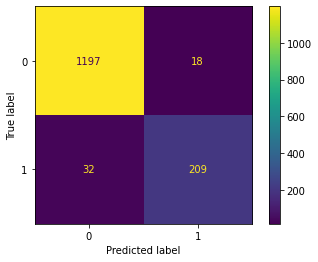

In [123]:
matrix = confusion_matrix(y_test, predicted)
display = ConfusionMatrixDisplay(confusion_matrix = matrix)
display.plot()
plt.show()